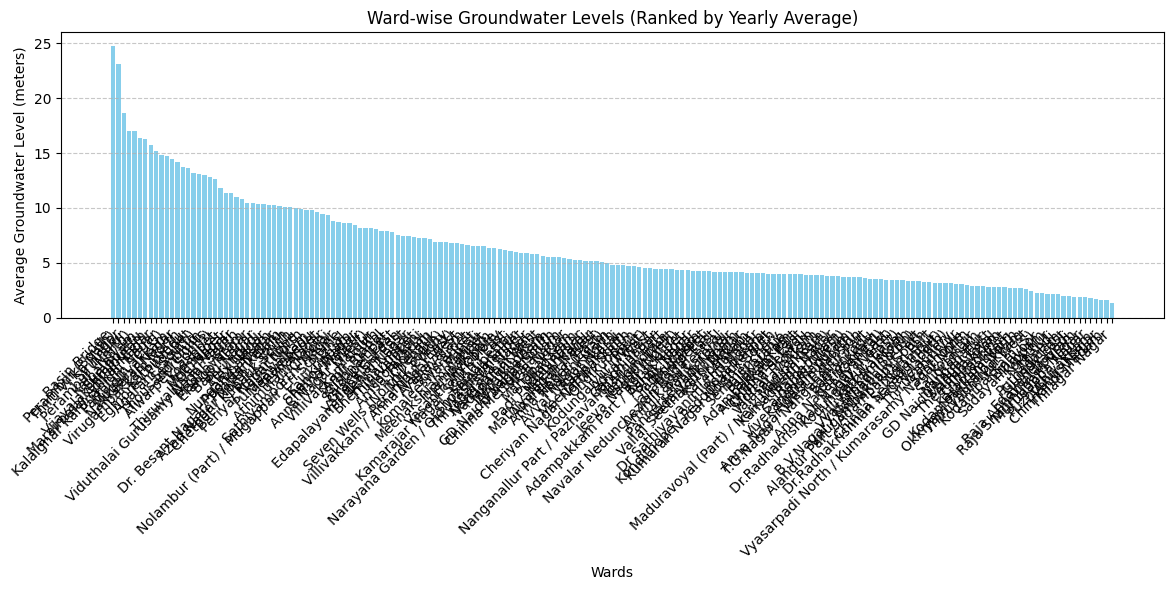


Wards Ranked by Groundwater Levels:
            Location  Year  Yearly Average   Rank  Variability          Trend
0        Kathivakkam  2021        1.788182  189.0     0.174495      Declining
1        Kathivakkam  2021        3.213250  149.0     0.452457      Declining
2           Ernavoor  2021        2.277083  176.0     0.463339      Declining
3     Sadaiyankuppam  2021        3.478167  139.0     0.523349      Declining
4    Kamadhenu Nagar  2021        3.776333  122.0     0.651943      Declining
..               ...   ...             ...    ...          ...            ...
195      Injampakkam  2024        5.663333   44.0     0.366379  Stable/Rising
196       Karapakkam  2024        2.196667  163.0     0.674858  Stable/Rising
197  Shozhinganallur  2024        5.630000   46.0     1.048427  Stable/Rising
198          Uthandi  2024        1.326667  185.0     0.462313  Stable/Rising
199      Semmenchery  2024        3.326667  115.0     0.447474  Stable/Rising

[800 rows x 6 columns]

Wa

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# File paths for 2021-2024
file_path_2021 = "../dataset/chennai-ground-water-levels-2021.csv"
file_path_2022 = "../dataset/chennai-ground-water-levels-2022.csv"
file_path_2023 = "../dataset/chennai-ground-water-levels-2023.csv"
file_path_2024 = "../dataset/chennai-ground-water-levels-2024.csv"

# Load datasets
df_2021 = pd.read_csv(file_path_2021)
df_2022 = pd.read_csv(file_path_2022)
df_2023 = pd.read_csv(file_path_2023)
df_2024 = pd.read_csv(file_path_2024)

# List of monthly columns
monthly_columns = ["Jan ", "Feb", "Mar", "Apr ", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

# Data Preparation: Ensure all datasets have necessary columns
def prepare_data(df, year=None):
    if year == 2024:
        df[monthly_columns[3:]] = np.nan  # Set Apr-Dec to NaN for 2024
    df[monthly_columns] = df[monthly_columns].apply(pd.to_numeric, errors='coerce')
    df["Yearly Average"] = df[monthly_columns].mean(axis=1)
    return df

# Apply preparation function
df_2021 = prepare_data(df_2021, 2021)
df_2022 = prepare_data(df_2022, 2022)
df_2023 = prepare_data(df_2023, 2023)
df_2024 = prepare_data(df_2024, 2024)

# Add Year Column
df_2021["Year"] = 2021
df_2022["Year"] = 2022
df_2023["Year"] = 2023
df_2024["Year"] = 2024

# Combine all datasets
df_all_years = pd.concat([df_2021, df_2022, df_2023, df_2024])

# Step 1: Rank Wards by Average Groundwater Level
df_all_years["Rank"] = df_all_years.groupby("Year")["Yearly Average"].rank(ascending=False)

# Step 2: Identify Wards with Consistent Drops or High Variability
df_all_years["Variability"] = df_all_years[monthly_columns].std(axis=1)
df_all_years["Trend"] = df_all_years[monthly_columns].apply(lambda x: "Declining" if x.iloc[-1] < x.iloc[0] else "Stable/Rising", axis=1)

# Create directory for saving plots
output_dir = "ward level comp"
os.makedirs(output_dir, exist_ok=True)

# Step 3: Split Locations into Groups of 6
locations = df_all_years["Location"].unique()
num_plots = int(np.ceil(len(locations) / 6))  # Calculate number of plots needed

# Step 4: Loop through each year and generate plots
years = [2021, 2022, 2023, 2024]
for year in years:
    df_year = df_all_years[df_all_years["Year"] == year]  # Filter data for specific year

    for i in range(num_plots):
        plt.figure(figsize=(12, 6))

        start_idx = i * 6
        end_idx = start_idx + 6
        selected_locations = locations[start_idx:end_idx]  # Select 6 locations per plot

        for location in selected_locations:
            subset = df_year[df_year["Location"] == location]
            
            if not subset.empty:  # Ensure the location exists in this year's data
                values = subset[monthly_columns].iloc[0].values  
                plt.plot(monthly_columns, values, marker='o', label=location)

        # Prepare plot title and filename
        plot_title = f"Monthly Groundwater Levels for {year} (Wards {start_idx + 1}-{min(end_idx, len(locations))})"
        plt.xlabel("Months")
        plt.ylabel("Groundwater Level (m)")
        plt.title(plot_title)
        plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), title="Wards")
        plt.grid()
        plt.tight_layout()

        # Save plot
        sanitized_title = plot_title.replace(" ", "_").replace(":", "").replace("(", "").replace(")", "")
        plt.savefig(os.path.join(output_dir, f"{sanitized_title}.png"))
        plt.close()

# Step 5: Visualize Wards Ranked by Groundwater Levels
plt.figure(figsize=(12, 6))
df_sorted = df_all_years.sort_values("Yearly Average", ascending=False)
plt.bar(df_sorted["Location"], df_sorted["Yearly Average"], color="skyblue")
plt.title("Ward-wise Groundwater Levels (Ranked by Yearly Average)")
plt.xlabel("Wards")
plt.ylabel("Average Groundwater Level (meters)")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "Ward-wise_Groundwater_Levels.png"))
plt.show()

# Step 6: Display Insights
high_variability = df_all_years[df_all_years["Variability"] > df_all_years["Variability"].mean()]
declining_trends = df_all_years[df_all_years["Trend"] == "Declining"]

# Print ward rankings
print("\nWards Ranked by Groundwater Levels:")
print(df_all_years[["Location", "Year", "Yearly Average", "Rank", "Variability", "Trend"]])

# Print high variability wards
print("\nWards with High Variability in Groundwater Levels:")
print(high_variability[["Location", "Yearly Average", "Variability"]])

# Print wards with declining trends
print("\nWards with Declining Trends in Groundwater Levels:")
print(declining_trends[["Location", "Yearly Average", "Trend"]])


In [2]:
# Save high variability wards data
high_variability_output = os.path.join(output_dir, "high_variability_wards.csv")
high_variability[["Location", "Yearly Average", "Variability"]].to_csv(high_variability_output, index=False)
print(f"High variability wards saved to: {high_variability_output}")

# Save declining trend wards data
declining_trends_output = os.path.join(output_dir, "declining_trend_wards.csv")
declining_trends[["Location", "Yearly Average", "Trend"]].to_csv(declining_trends_output, index=False)
print(f"Declining trend wards saved to: {declining_trends_output}")

# Save stable/rising trend wards data
stable_rising = df_all_years[df_all_years["Trend"] == "Stable/Rising"]
stable_rising_output = os.path.join(output_dir, "stable_rising_wards.csv")
stable_rising[["Location", "Yearly Average", "Trend"]].to_csv(stable_rising_output, index=False)
print(f"Stable/Rising trend wards saved to: {stable_rising_output}")


High variability wards saved to: ward level comp\high_variability_wards.csv
Declining trend wards saved to: ward level comp\declining_trend_wards.csv
Stable/Rising trend wards saved to: ward level comp\stable_rising_wards.csv


C:\Users\rumma\AppData\Local\Temp\ipykernel_24348\2296496698.py:26: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df_melted[df_melted["Month"] == month]["Groundwater Level"].values for month in month_order],
C:\Users\rumma\AppData\Local\Temp\ipykernel_24348\2296496698.py:37: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.savefig(output_path, bbox_inches="tight")
C:\Users\rumma\Desktop\8th Sem\El Nino\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


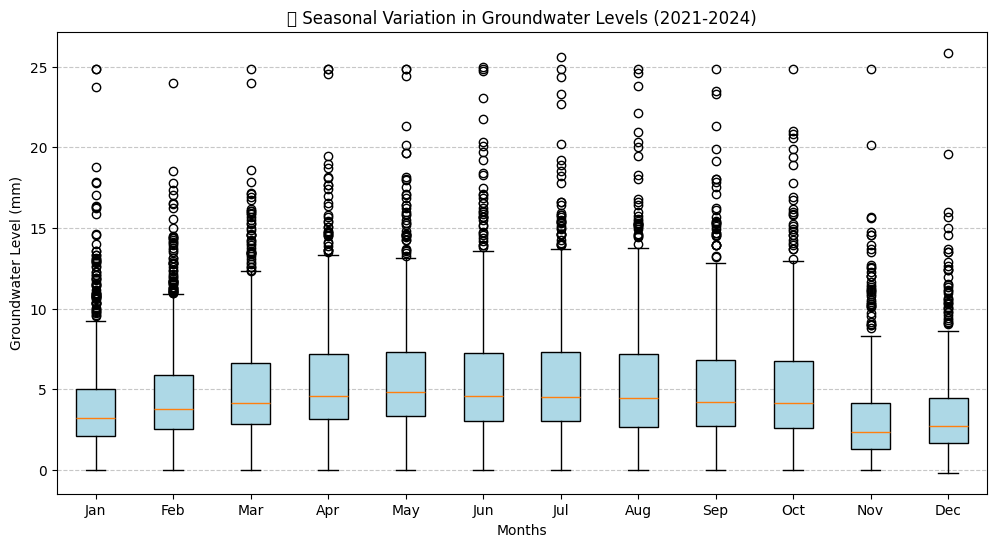

📊 Seasonal variation visualization saved to: ./output/Seasonal_Variation_Groundwater.png


In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import os

# Load processed dataset
df_all_years = pd.read_csv("./output/temporal_analysis_data.csv")

# Standardized Monthly Column Names
monthly_columns = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
                   "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

# Reshape data for box plot (Melt DataFrame)
df_melted = df_all_years.melt(id_vars=["Year"], value_vars=monthly_columns, 
                              var_name="Month", value_name="Groundwater Level")

# Drop NaN values (important for 2024 where Apr-Dec are NaN)
df_melted.dropna(inplace=True)

# Sort months properly for x-axis order
month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
               "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
df_melted["Month"] = pd.Categorical(df_melted["Month"], categories=month_order, ordered=True)

# Create a box plot
plt.figure(figsize=(12, 6))
plt.boxplot([df_melted[df_melted["Month"] == month]["Groundwater Level"].values for month in month_order], 
            labels=month_order, patch_artist=True, boxprops=dict(facecolor="lightblue"))

# Formatting
plt.xlabel("Months")
plt.ylabel("Groundwater Level (mm)")
plt.title("📉 Seasonal Variation in Groundwater Levels (2021-2024)")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Save and Show Plot
output_path = "./output/Seasonal_Variation_Groundwater.png"
plt.savefig(output_path, bbox_inches="tight")
plt.show()

print(f"📊 Seasonal variation visualization saved to: {output_path}")


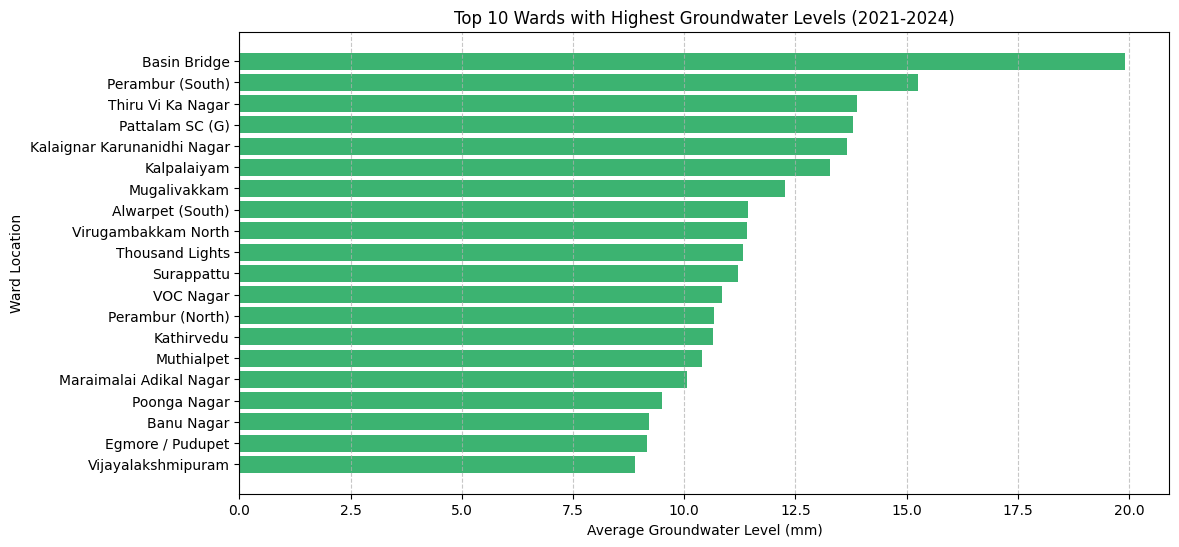

📊 Top 10 ward-wise ranking visualization saved to: ./output/Top_10_Wardwise_Groundwater.png


In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import os

# Load processed dataset
df_all_years = pd.read_csv("./output/temporal_analysis_data.csv")

# Aggregate data: Compute the average groundwater level per ward across all years
df_ward_avg = df_all_years.groupby("Location")["Yearly Average"].mean().reset_index()

# Sort by highest groundwater level and select top 10 wards
df_top_10 = df_ward_avg.sort_values(by="Yearly Average", ascending=False).head(20)

# **Create a bar chart**
plt.figure(figsize=(12, 6))
plt.barh(df_top_10["Location"], df_top_10["Yearly Average"], color="mediumseagreen")
plt.xlabel("Average Groundwater Level (mm)")
plt.ylabel("Ward Location")
plt.title("Top 10 Wards with Highest Groundwater Levels (2021-2024)")
plt.gca().invert_yaxis()  # Invert y-axis to show the highest rank at the top
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Save and Show Plot
output_path = "./output/Top_10_Wardwise_Groundwater.png"
plt.savefig(output_path, bbox_inches="tight")
plt.show()

print(f"📊 Top 10 ward-wise ranking visualization saved to: {output_path}")


C:\Users\rumma\AppData\Local\Temp\ipykernel_24348\1148565614.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Location", y="Yearly Average", data=df_all_years[df_all_years["Location"].isin(df_top_variability["Location"])], palette="coolwarm")


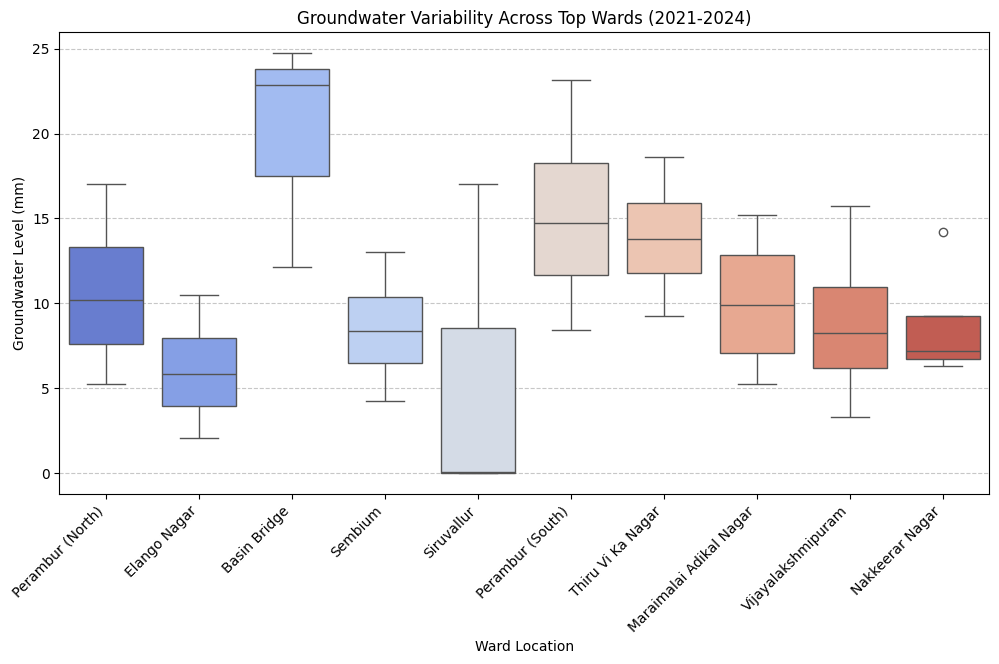

📊 Groundwater variability visualization saved to: ./output/Top_Wards_Groundwater_Variability.png


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

# Load processed dataset
df_all_years = pd.read_csv("./output/temporal_analysis_data.csv")

# Compute groundwater variability (standard deviation) for each ward
df_variability = df_all_years.groupby("Location")[["Yearly Average"]].std().reset_index()
df_variability.columns = ["Location", "Variability"]

# Select top 10 most variable wards
df_top_variability = df_variability.sort_values(by="Variability", ascending=False).head(10)

# **Box Plot Visualization**
plt.figure(figsize=(12, 6))
sns.boxplot(x="Location", y="Yearly Average", data=df_all_years[df_all_years["Location"].isin(df_top_variability["Location"])], palette="coolwarm")

plt.xlabel("Ward Location")
plt.ylabel("Groundwater Level (mm)")
plt.title("Groundwater Variability Across Top Wards (2021-2024)")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Save and Show Plot
output_path = "./output/Top_Wards_Groundwater_Variability.png"
plt.savefig(output_path, bbox_inches="tight")
plt.show()

print(f"📊 Groundwater variability visualization saved to: {output_path}")


In [6]:
import pandas as pd

# Load the processed dataset
input_csv = "./output/location_based_groundwater_insights.csv"
df = pd.read_csv(input_csv)

# Ensure required columns exist
required_columns = ["Location", "Area No.", "avg_level", "change_2021_2024"]
for col in required_columns:
    if col not in df.columns:
        raise ValueError(f"❌ Missing required column: {col}")

# **Select the Top 10 Wards with the Lowest Yearly Average Groundwater Levels**
lowest_groundwater_wards = df.nsmallest(10, "avg_level")

# Display the table
print("\n📉 **TOP 10 DECLINING TREND WARDS (LOWEST YEARLY AVERAGE GROUNDWATER LEVELS)**")
print(lowest_groundwater_wards[["Location", "Area No.", "avg_level", "change_2021_2024"]])

# Save results to CSV
output_csv = "./output/top_10_declining_trend_wards.csv"
lowest_groundwater_wards.to_csv(output_csv, index=False)
print(f"\n✅ Table saved to: {output_csv}")




📉 **TOP 10 DECLINING TREND WARDS (LOWEST YEARLY AVERAGE GROUNDWATER LEVELS)**
                Location Area No.  avg_level  change_2021_2024
158       Thilagar Nagar        I   0.942127         -0.203000
131           Puthagaram      VII   1.131188          0.620250
176          Venus Nagar       VI   1.311979         -0.350333
99       Murugappa Nagar        I   1.321417         -1.503500
139        Sadayankuppam        I   1.343564         -1.410758
36       Chinnandi Madam      III   1.373672          0.073030
133       Puzhuthivakkam      XIV   1.403049         -0.673030
163   Thiruvanmiyur West     XIII   1.528973         -0.111167
44         Edayanchavadi        I   1.549500         -0.702417
134  Raja Annamalaipuram     XIII   1.642557          0.476583

✅ Table saved to: ./output/top_10_declining_trend_wards.csv


In [7]:
import pandas as pd

# Load the processed dataset
input_csv = "./output/location_based_groundwater_insights.csv"
df = pd.read_csv(input_csv)

# Ensure required columns exist
required_columns = ["Location", "Area No.", "min_level", "max_level", "avg_level"]
for col in required_columns:
    if col not in df.columns:
        raise ValueError(f"❌ Missing required column: {col}")

# Calculate **Fluctuation** (Max - Min groundwater level)
df["Fluctuation"] = df["max_level"] - df["min_level"]

# Select **Top 10 Wards** with **Highest Variability (Fluctuation)**
high_variability_wards = df.nlargest(10, "Fluctuation")

# Display the table
print("\n📊 **TOP 10 HIGH VARIABILITY WARDS (HIGHEST GROUNDWATER FLUCTUATIONS)**")
print(high_variability_wards[["Location", "Area No.", "min_level", "max_level", "Fluctuation", "avg_level"]])

# Save results to CSV
output_csv = "./output/top_10_high_variability_wards.csv"
high_variability_wards.to_csv(output_csv, index=False)
print(f"\n✅ Table saved to: {output_csv}")



📊 **TOP 10 HIGH VARIABILITY WARDS (HIGHEST GROUNDWATER FLUCTUATIONS)**
                    Location Area No.  min_level  max_level  Fluctuation  \
151               Siruvallur       VI   0.000000  17.038333    17.038333   
124         Perambur (South)       VI   8.450000  23.129750    14.679750   
27              Basin Bridge        V  12.159667  24.741429    12.581762   
178       Vijayalakshmipuram      VII   3.286667  15.760667    12.474000   
123         Perambur (North)       IV   5.266667  17.013250    11.746583   
88   Maraimalai Adikal Nagar       VI   5.240000  15.209583     9.969583   
159        Thiru Vi Ka Nagar       VI   9.263333  18.635250     9.371917   
146                  Sembium       VI   4.270000  13.040500     8.770500   
46              Elango Nagar       IV   2.040000  10.474833     8.434833   
77                  Kosappet       VI   3.556667  11.816583     8.259917   

     avg_level  
151   5.698244  
124  15.251875  
27   19.915698  
178   8.897854  
123  1

In [8]:
import pandas as pd

# Load the processed dataset
input_csv = "./output/location_based_groundwater_insights.csv"
df = pd.read_csv(input_csv)

# Ensure required columns exist
required_columns = ["Location", "Area No.", "avg_level"]
for col in required_columns:
    if col not in df.columns:
        raise ValueError(f"❌ Missing required column: {col}")

# Select **Top 10 Wards** with **Highest Yearly Average Groundwater Levels**
stable_rising_wards = df.nlargest(10, "avg_level")

# Display the table
print("\n📊 **TOP 10 STABLE/RISING WARDS (HIGHEST YEARLY AVERAGE GROUNDWATER LEVELS)**")
print(stable_rising_wards[["Location", "Area No.", "avg_level"]])

# Save results to CSV
output_csv = "./output/top_10_stable_rising_wards.csv"
stable_rising_wards.to_csv(output_csv, index=False)
print(f"\n✅ Table saved to: {output_csv}")



📊 **TOP 10 STABLE/RISING WARDS (HIGHEST YEARLY AVERAGE GROUNDWATER LEVELS)**
                        Location Area No.  avg_level
27                  Basin Bridge        V  19.915698
124             Perambur (South)       VI  15.251875
159            Thiru Vi Ka Nagar       VI  13.880896
121              Pattalam SC (G)       VI  13.804139
58   Kalaignar Karunanidhi Nagar        X  13.653646
60                   Kalpalaiyam      III  13.287062
98                  Mugalivakkam      XII  12.277926
9               Alwarpet (South)       IX  11.442063
182          Virugambakkam North        X  11.418500
165              Thousand Lights       IX  11.326937

✅ Table saved to: ./output/top_10_stable_rising_wards.csv
